In [ ]:
"""
- vanilla network - emnist
- vgg19 - transfer learning - emnist
"""

# Siamese Networks

In [1]:
import tensorflow
from matplotlib import pyplot
from keras.datasets import cifar10
from emnist import extract_training_samples
from tensorflow.keras import *
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19
# tensorflow.keras.utils.set_random_seed(0)
# tensorflow.config.experimental.enable_op_determinism()

# !pip install emnist

%matplotlib inline

2024-04-28 19:52:23.616591: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-28 19:52:23.643812: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-28 19:52:24.070648: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## utils

In [2]:

def print_history_chart(history):
    accuracy =history.history['accuracy']
    val_accuracy =history.history['val_accuracy']
    
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']


    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(range(1,len(accuracy)+1),accuracy,color='red',label = "Training Accuracy")
    plt.plot(range(1,len(accuracy)+1),val_accuracy,color='blue',label = "Validation Accuracy")
    plt.ylabel('accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(range(1,len(accuracy)+1),loss,color='red',label = "Training Loss")
    plt.plot(range(1,len(accuracy)+1),val_loss,color='blue',label = "Validation Loss")
    plt.ylabel('Cross Entropy')
    plt.title('Model')
    plt.legend()
    plt.title('Training and Validation Loss')

In [3]:

def show_dataset(x_train):
    img_rows, img_cols = x_train.shape[1], x_train.shape[2]
    col1 = 10
    row1 = 1

    # Show a few sample digits from the training set
    plt.rcParams['figure.figsize'] = (1.0, 1.0) # set default size of plots
    col2 = 20
    row2 = 5
    fig = plt.figure(figsize=(col2, row2))
    for index in range(col1*row1, col1*row1 + col2*row2):
        fig.add_subplot(row2, col2, index - col1*row1 + 1)
        plt.axis('off')
        plt.imshow(x_train[index]) # index of the sample picture
    plt.show()
    


In [4]:
EPOCHS = 10 # parameter for model.fit. It is here just for my convenience 

# Vanilla Network

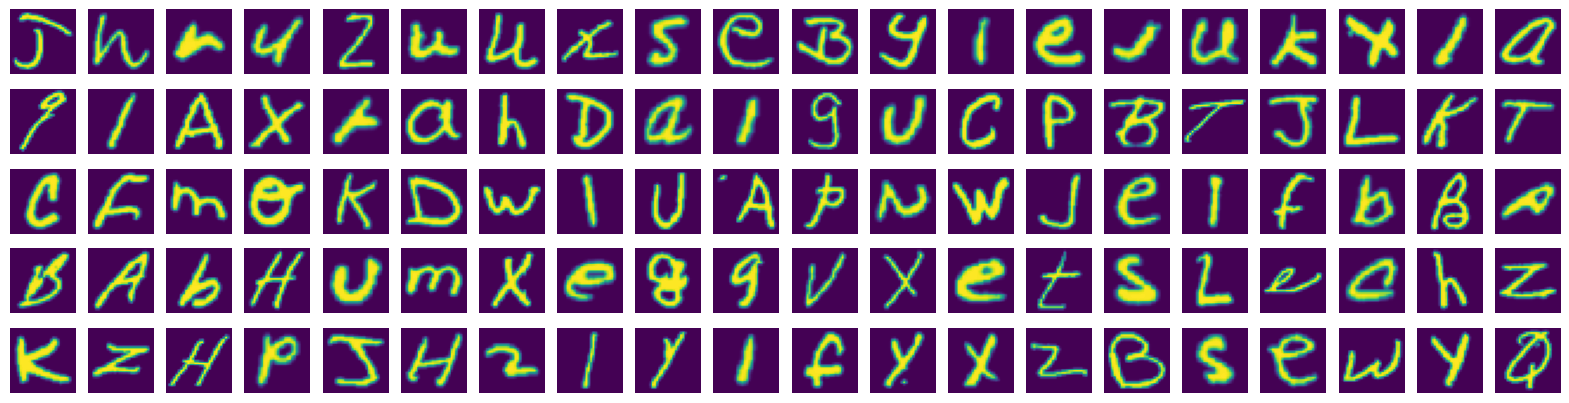

(124800, 28, 28, 1)
26


2024-04-28 19:52:26.622072: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9733 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/10


I0000 00:00:1714326747.898585  134169 service.cc:145] XLA service 0x78dc00016df0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714326747.898607  134169 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-04-28 19:52:27.916414: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-28 19:52:28.002609: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1714326748.450162  134212 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_418', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714326748.786790  134208 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_418', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:17

 35/780 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3467 - loss: 2.3183

I0000 00:00:1714326750.652607  134169 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


780/780 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7872 - loss: 0.7111 - val_accuracy: 0.9288 - val_loss: 0.2124
Epoch 2/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9358 - loss: 0.1845 - val_accuracy: 0.9355 - val_loss: 0.1892
Epoch 3/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9516 - loss: 0.1309 - val_accuracy: 0.9404 - val_loss: 0.1834
Epoch 4/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9599 - loss: 0.1040 - val_accuracy: 0.9401 - val_loss: 0.1957
Epoch 5/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9673 - loss: 0.0804 - val_accuracy: 0.9385 - val_loss: 0.1958
Epoch 6/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9725 - loss: 0.0673 - val_accuracy: 0.9331 - val_loss: 0.2210
Epoch 7/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9752 - loss: 0.0601 - val_accuracy: 0.9367 - val_loss: 0.2459
Epoch 8/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9784 - loss: 0.0529 - val_accuracy: 0.9318 - val_

In [5]:


images, labels = extract_training_samples('letters')
images.astype('float32') 
show_dataset(images)

images = images/255.
img_rows, img_cols = images.shape[1:3]
images = images.reshape(images.shape[0], images.shape[1], images.shape[2], 1)
print(images.shape)

num_classes = np.size(np.unique(labels)) 
print(num_classes)
labels = utils.to_categorical(labels-1, num_classes) 


x_train, x_rem, y_train, y_rem = train_test_split(images,labels, train_size=0.8)
test_size = 0.5
x_val, x_test, y_val, y_test = train_test_split(x_rem,y_rem, test_size=0.8)


def create_model1():
    model1 = models.Sequential()
    model1.add(Input(shape=(images.shape[1],images.shape[2],1)  ))
    model1.add(layers.Conv2D(32, (3, 3), activation='relu',))
    model1.add(layers.MaxPooling2D((2, 2)))
    model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model1.add(layers.Flatten())
    model1.add(layers.Dense(512, activation='relu'))
    model1.add(layers.Dense(num_classes, activation='softmax'))

    model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model1 


model1 = create_model1()
history1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=128, epochs=EPOCHS)

In [6]:
model1.save('emnist/models/model1_siamese_vanilla_emnist.h5')

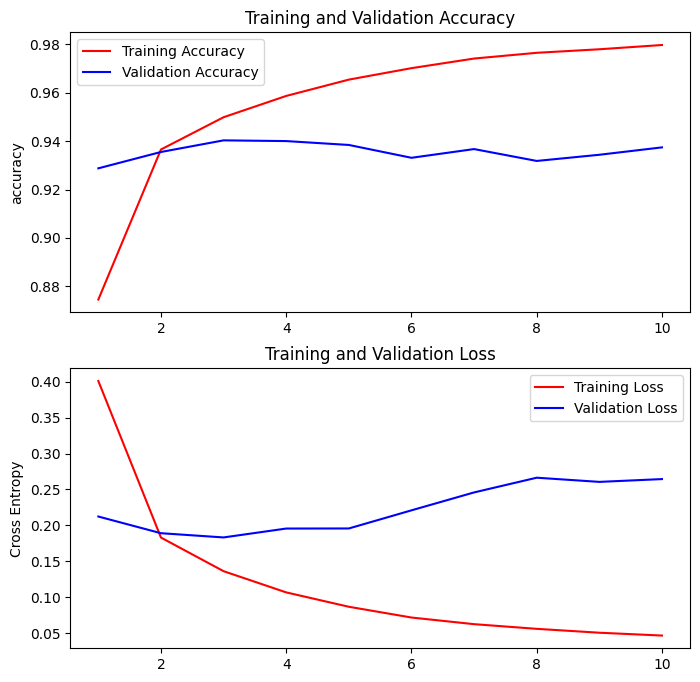

In [7]:
print_history_chart(history1)

# VGG19 transfer learning

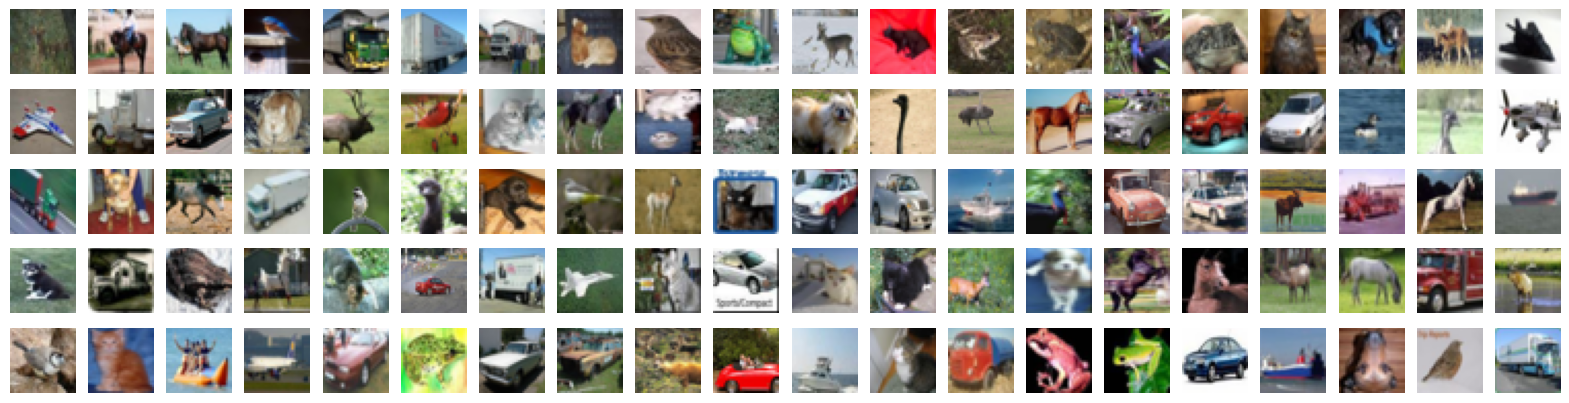

In [8]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
show_dataset(x_train)


num_classes = 10 
x_train = x_train/255.
y_train = utils.to_categorical(y_train, num_classes) 

x_test = x_test/255.
y_test = utils.to_categorical(y_test, num_classes) 


In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:

conv_base = VGG19(weights=None,
                  include_top=False,
                  input_shape=(32, 32, 3))
# conv_base.trainable = False

print(conv_base.summary())



Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
# model3.add(layers.Dense(256, activation='relu'))
# model3.add(layers.Dense(256, activation='relu'))
# model3.add(layers.Dropout(rate=0.2))
# model3.add(layers.Dense(256, activation='relu'))
# model3.add(layers.Dense(256, activation='relu'))

model3.add(layers.Dense(num_classes, activation='softmax'))



model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, batch_size=128, epochs=EPOCHS,validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 78ms/step - accuracy: 0.0979 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.1016 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.0984 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.1025 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.0979 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.1001 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.1017 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.0968 - loss: 2.3027 - 

: 

In [ ]:
print(model3.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 1, 1, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,088,544 (229.22 MB)

 Trainable params: 20,029,514 (76.41 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,059,030 (152.81 MB)

None


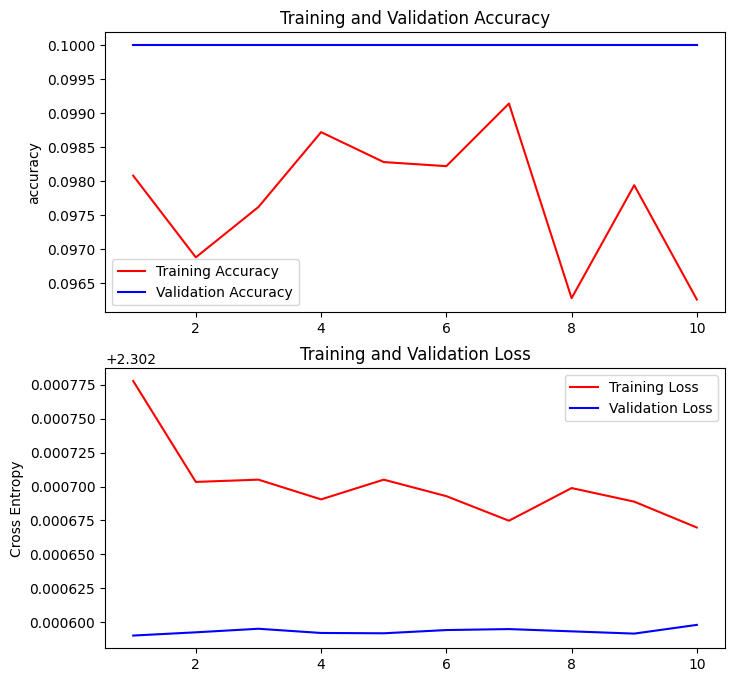

In [ ]:
# model3.evaluate(x_test, y_test, verbose=0)

print_history_chart(history3)